In [3]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesClassifier
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import pickle
import warnings
warnings.filterwarnings('ignore')

In [4]:
col_names = ['class', 'lymphatics', 'block of affere', 'bl. of lymph. c', 'bl. of lymph. s', 'by pass', 'extravasates', 'regeneration of', 'early uptake in', 'lym.nodes dimin', 'lym.nodes enlar', 'changes in lym.', 'defect in node', 'changes in node', 'changes in stru', 'special forms', 'dislocation of', 'exclusion of no', 'no. of nodes in']

In [5]:
df = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/lymphography/lymphography.data",names=col_names)


In [6]:
df.head()

class  lymphatics  block of affere  bl. of lymph. c  bl. of lymph. s  \
0      3           4                2                1                1   
1      2           3                2                1                1   
2      3           3                2                2                2   
3      3           3                1                1                1   
4      2           3                1                1                1   

   by pass  extravasates  regeneration of  early uptake in  lym.nodes dimin  \
0        1             1                1                2                1   
1        2             2                1                2                1   
2        2             2                2                2                1   
3        1             2                1                2                1   
4        1             1                1                1                1   

   lym.nodes enlar  changes in lym.  defect in node  changes in node  \
0                2                2               2                4   
1                3                3               2                3   
2                4                3               3                4   
3                3                3               4                4   
4                2                2               4                3   

   changes in stru  special forms  dislocation of  exclusion of no  \
0                8              1               1                2   
1                4              2               2                2   
2                8              3               2                2   
3                4              3               1                2   
4                5              1               2                2   

   no. of nodes in  
0                2  
1                2  
2                7  
3                6  
4                1

In [7]:
df.tail()

class  lymphatics  block of affere  bl. of lymph. c  bl. of lymph. s  \
143      3           3                2                1                1   
144      2           2                1                1                1   
145      3           2                2                1                1   
146      2           2                1                1                1   
147      2           2                2                2                1   

     by pass  extravasates  regeneration of  early uptake in  lym.nodes dimin  \
143        2             2                1                2                1   
144        1             1                1                1                1   
145        1             2                1                2                1   
146        1             1                1                2                1   
147        2             2                1                2                1   

     lym.nodes enlar  changes in lym.  defect in node  changes in node  \
143                2                2               4                3   
144                1                1               1                1   
145                3                3               3                3   
146                2                2               4                2   
147                3                3               4                3   

     changes in stru  special forms  dislocation of  exclusion of no  \
143                5              2               2                2   
144                3              1               2                2   
145                8              3               2                2   
146                2              1               2                2   
147                4              3               2                2   

     no. of nodes in  
143                4  
144                1  
145                4  
146                1  
147                6

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   class            148 non-null    int64
 1   lymphatics       148 non-null    int64
 2   block of affere  148 non-null    int64
 3   bl. of lymph. c  148 non-null    int64
 4   bl. of lymph. s  148 non-null    int64
 5   by pass          148 non-null    int64
 6   extravasates     148 non-null    int64
 7   regeneration of  148 non-null    int64
 8   early uptake in  148 non-null    int64
 9   lym.nodes dimin  148 non-null    int64
 10  lym.nodes enlar  148 non-null    int64
 11  changes in lym.  148 non-null    int64
 12  defect in node   148 non-null    int64
 13  changes in node  148 non-null    int64
 14  changes in stru  148 non-null    int64
 15  special forms    148 non-null    int64
 16  dislocation of   148 non-null    int64
 17  exclusion of no  148 non-null    int64
 18  no. of nod

In [9]:
df.isnull().any()

class              False
lymphatics         False
block of affere    False
bl. of lymph. c    False
bl. of lymph. s    False
by pass            False
extravasates       False
regeneration of    False
early uptake in    False
lym.nodes dimin    False
lym.nodes enlar    False
changes in lym.    False
defect in node     False
changes in node    False
changes in stru    False
special forms      False
dislocation of     False
exclusion of no    False
no. of nodes in    False
dtype: bool

In [10]:
df.isnull().sum()

class              0
lymphatics         0
block of affere    0
bl. of lymph. c    0
bl. of lymph. s    0
by pass            0
extravasates       0
regeneration of    0
early uptake in    0
lym.nodes dimin    0
lym.nodes enlar    0
changes in lym.    0
defect in node     0
changes in node    0
changes in stru    0
special forms      0
dislocation of     0
exclusion of no    0
no. of nodes in    0
dtype: int64

In [11]:
df.describe()

class  lymphatics  block of affere  bl. of lymph. c  \
count  148.000000  148.000000       148.000000       148.000000   
mean     2.452703    2.743243         1.554054         1.175676   
std      0.575396    0.817509         0.498757         0.381836   
min      1.000000    1.000000         1.000000         1.000000   
25%      2.000000    2.000000         1.000000         1.000000   
50%      2.000000    3.000000         2.000000         1.000000   
75%      3.000000    3.000000         2.000000         1.000000   
max      4.000000    4.000000         2.000000         2.000000   

       bl. of lymph. s     by pass  extravasates  regeneration of  \
count       148.000000  148.000000    148.000000       148.000000   
mean          1.047297    1.243243      1.506757         1.067568   
std           0.212995    0.430498      0.501652         0.251855   
min           1.000000    1.000000      1.000000         1.000000   
25%           1.000000    1.000000      1.000000         1.000000   
50%           1.000000    1.000000      2.000000         1.000000   
75%           1.000000    1.000000      2.000000         1.000000   
max           2.000000    2.000000      2.000000         2.000000   

       early uptake in  lym.nodes dimin  lym.nodes enlar  changes in lym.  \
count       148.000000       148.000000       148.000000       148.000000   
mean          1.702703         1.060811         2.472973         2.398649   
std           0.458621         0.313557         0.836627         0.568323   
min           1.000000         1.000000         1.000000         1.000000   
25%           1.000000         1.000000         2.000000         2.000000   
50%           2.000000         1.000000         2.000000         2.000000   
75%           2.000000         1.000000         3.000000         3.000000   
max           2.000000         3.000000         4.000000         3.000000   

       defect in node  changes in node  changes in stru  special forms  \
count      148.000000       148.000000       148.000000     148.000000   
mean         2.966216         2.804054         5.216216       2.331081   
std          0.868305         0.761834         2.171368       0.777126   
min          1.000000         1.000000         1.000000       1.000000   
25%          2.000000         2.000000         4.000000       2.000000   
50%          3.000000         3.000000         5.000000       3.000000   
75%          4.000000         3.000000         8.000000       3.000000   
max          4.000000         4.000000         8.000000       3.000000   

       dislocation of  exclusion of no  no. of nodes in  
count      148.000000       148.000000       148.000000  
mean         1.662162         1.790541         2.601351  
std          0.474579         0.408305         1.905023  
min          1.000000         1.000000         1.000000  
25%          1.000000         2.000000         1.000000  
50%          2.000000         2.000000         2.000000  
75%          2.000000         2.000000         3.000000  
max          2.000000         2.000000         8.000000

In [12]:
cor=df.corr()

<Axes: >

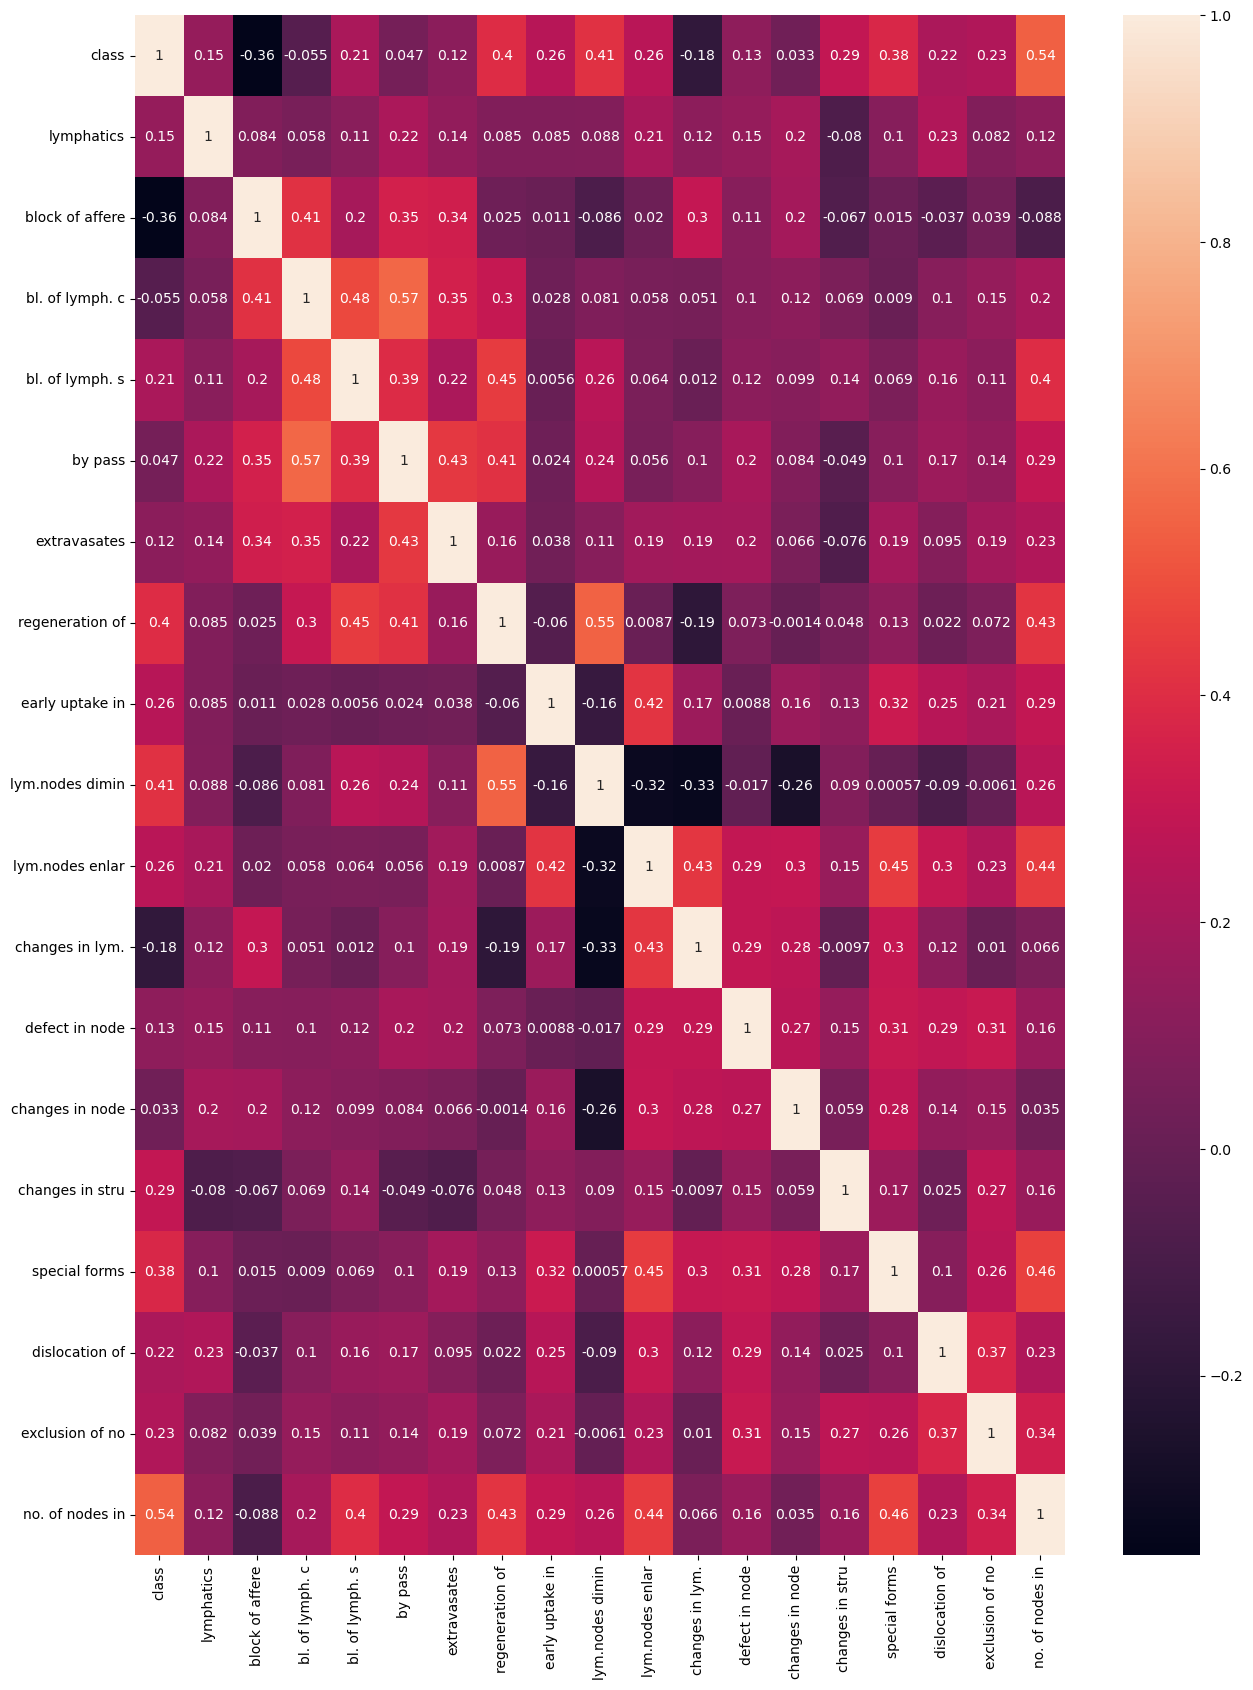

In [13]:
plt.figure(figsize=(15,20))
sns.heatmap(cor,annot=True)

<Axes: xlabel='by pass', ylabel='Density'>

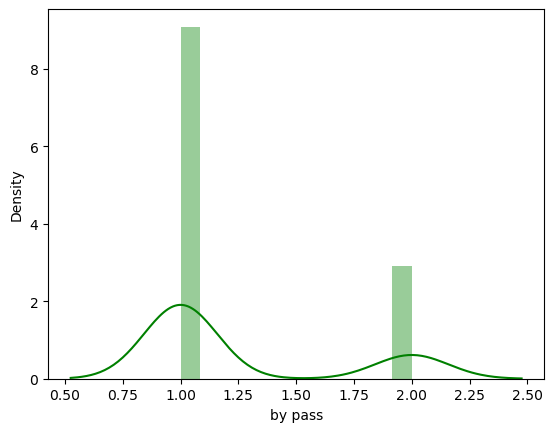

In [14]:
sns.distplot(df["by pass"],color='g')

<Axes: xlabel='count', ylabel='by pass'>

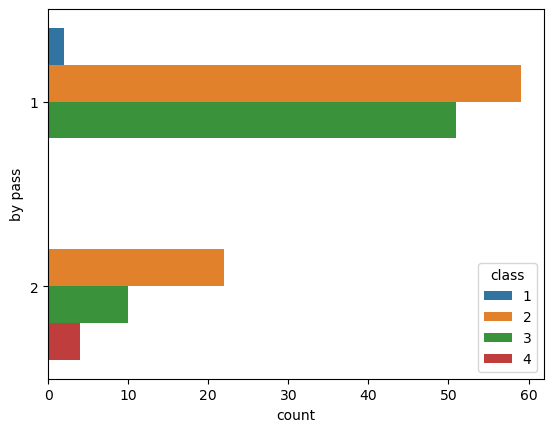

In [15]:
sns.countplot(data=df,y="by pass",hue="class")

In [16]:
df.shape

(148, 19)

<Axes: >

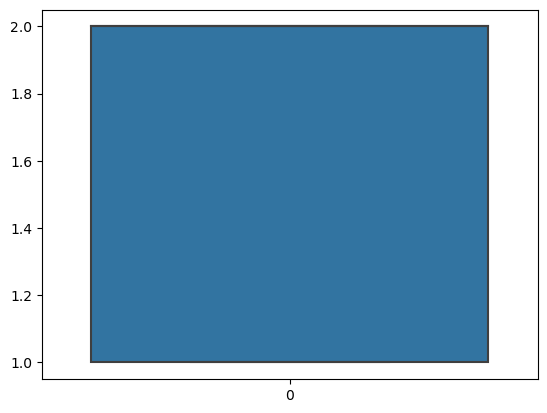

In [17]:
sns.boxplot(df["block of affere"])

<Axes: >

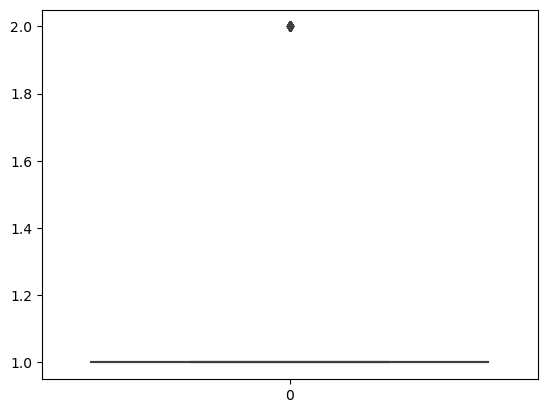

In [18]:
sns.boxplot(df["bl. of lymph. c"])

<Axes: >

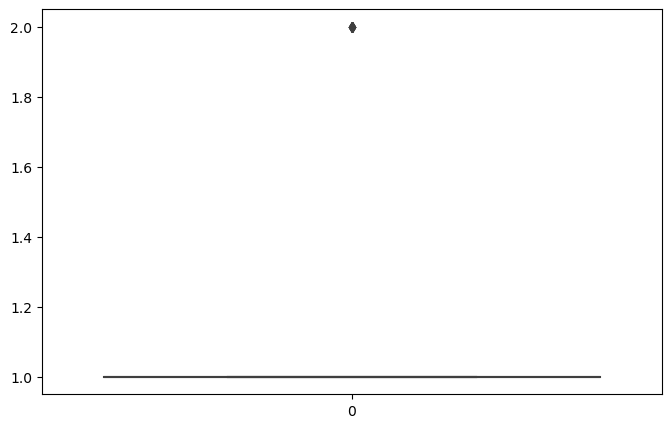

In [19]:
plt.figure(figsize=(8,5))
sns.boxplot(df["bl. of lymph. s"])


In [20]:
x=df.iloc[:,1:]

In [21]:
x.head()


lymphatics  block of affere  bl. of lymph. c  bl. of lymph. s  by pass  \
0           4                2                1                1        1   
1           3                2                1                1        2   
2           3                2                2                2        2   
3           3                1                1                1        1   
4           3                1                1                1        1   

   extravasates  regeneration of  early uptake in  lym.nodes dimin  \
0             1                1                2                1   
1             2                1                2                1   
2             2                2                2                1   
3             2                1                2                1   
4             1                1                1                1   

   lym.nodes enlar  changes in lym.  defect in node  changes in node  \
0                2                2               2                4   
1                3                3               2                3   
2                4                3               3                4   
3                3                3               4                4   
4                2                2               4                3   

   changes in stru  special forms  dislocation of  exclusion of no  \
0                8              1               1                2   
1                4              2               2                2   
2                8              3               2                2   
3                4              3               1                2   
4                5              1               2                2   

   no. of nodes in  
0                2  
1                2  
2                7  
3                6  
4                1

In [22]:
y=df["class"]

In [23]:
y

0      3
1      2
2      3
3      3
4      2
      ..
143    3
144    2
145    3
146    2
147    2
Name: class, Length: 148, dtype: int64

In [24]:
x.shape

(148, 18)

In [25]:
y.shape


(148,)

In [26]:
y.nunique()

4

In [27]:
y.unique()

array([3, 2, 4, 1], dtype=int64)

In [28]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   lymphatics       148 non-null    int64
 1   block of affere  148 non-null    int64
 2   bl. of lymph. c  148 non-null    int64
 3   bl. of lymph. s  148 non-null    int64
 4   by pass          148 non-null    int64
 5   extravasates     148 non-null    int64
 6   regeneration of  148 non-null    int64
 7   early uptake in  148 non-null    int64
 8   lym.nodes dimin  148 non-null    int64
 9   lym.nodes enlar  148 non-null    int64
 10  changes in lym.  148 non-null    int64
 11  defect in node   148 non-null    int64
 12  changes in node  148 non-null    int64
 13  changes in stru  148 non-null    int64
 14  special forms    148 non-null    int64
 15  dislocation of   148 non-null    int64
 16  exclusion of no  148 non-null    int64
 17  no. of nodes in  148 non-null    int64
dtypes: int64(1

In [29]:
from sklearn.preprocessing import StandardScaler

In [30]:
sc=StandardScaler()

In [31]:
#feature scaling
from sklearn.preprocessing import MinMaxScaler
ms=MinMaxScaler()
x_scaled=pd.DataFrame(ms.fit_transform(x),columns=x.columns)

In [32]:
x_scaled

lymphatics  block of affere  bl. of lymph. c  bl. of lymph. s  by pass  \
0      1.000000              1.0              0.0              0.0      0.0   
1      0.666667              1.0              0.0              0.0      1.0   
2      0.666667              1.0              1.0              1.0      1.0   
3      0.666667              0.0              0.0              0.0      0.0   
4      0.666667              0.0              0.0              0.0      0.0   
..          ...              ...              ...              ...      ...   
143    0.666667              1.0              0.0              0.0      1.0   
144    0.333333              0.0              0.0              0.0      0.0   
145    0.333333              1.0              0.0              0.0      0.0   
146    0.333333              0.0              0.0              0.0      0.0   
147    0.333333              1.0              1.0              0.0      1.0   

     extravasates  regeneration of  early uptake in  lym.nodes dimin  \
0             0.0              0.0              1.0              0.0   
1             1.0              0.0              1.0              0.0   
2             1.0              1.0              1.0              0.0   
3             1.0              0.0              1.0              0.0   
4             0.0              0.0              0.0              0.0   
..            ...              ...              ...              ...   
143           1.0              0.0              1.0              0.0   
144           0.0              0.0              0.0              0.0   
145           1.0              0.0              1.0              0.0   
146           0.0              0.0              1.0              0.0   
147           1.0              0.0              1.0              0.0   

     lym.nodes enlar  changes in lym.  defect in node  changes in node  \
0           0.333333              0.5        0.333333         1.000000   
1           0.666667              1.0        0.333333         0.666667   
2           1.000000              1.0        0.666667         1.000000   
3           0.666667              1.0        1.000000         1.000000   
4           0.333333              0.5        1.000000         0.666667   
..               ...              ...             ...              ...   
143         0.333333              0.5        1.000000         0.666667   
144         0.000000              0.0        0.000000         0.000000   
145         0.666667              1.0        0.666667         0.666667   
146         0.333333              0.5        1.000000         0.333333   
147         0.666667              1.0        1.000000         0.666667   

     changes in stru  special forms  dislocation of  exclusion of no  \
0           1.000000            0.0             0.0              1.0   
1           0.428571            0.5             1.0              1.0   
2           1.000000            1.0             1.0              1.0   
3           0.428571            1.0             0.0              1.0   
4           0.571429            0.0             1.0              1.0   
..               ...            ...             ...              ...   
143         0.571429            0.5             1.0              1.0   
144         0.285714            0.0             1.0              1.0   
145         1.000000            1.0             1.0              1.0   
146         0.142857            0.0             1.0              1.0   
147         0.428571            1.0             1.0              1.0   

     no. of nodes in  
0           0.142857  
1           0.142857  
2           0.857143  
3           0.714286  
4           0.000000  
..               ...  
143         0.428571  
144         0.000000  
145         0.428571  
146         0.000000  
147         0.714286  

[148 rows x 18 columns]

In [33]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.2,random_state=0)

In [34]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((118, 18), (30, 18), (118,), (30,))

In [35]:
x_train.head()

lymphatics  block of affere  bl. of lymph. c  bl. of lymph. s  by pass  \
33     0.333333              1.0              0.0              0.0      0.0   
78     0.000000              0.0              0.0              0.0      0.0   
18     0.666667              0.0              0.0              0.0      0.0   
127    0.333333              1.0              0.0              0.0      0.0   
63     1.000000              1.0              0.0              0.0      0.0   

     extravasates  regeneration of  early uptake in  lym.nodes dimin  \
33            0.0              0.0              0.0              0.0   
78            0.0              0.0              0.0              0.0   
18            0.0              0.0              1.0              0.0   
127           1.0              0.0              1.0              0.0   
63            1.0              0.0              0.0              0.0   

     lym.nodes enlar  changes in lym.  defect in node  changes in node  \
33          0.000000              0.5        0.333333         0.666667   
78          0.000000              0.0        0.000000         0.000000   
18          0.333333              0.5        0.333333         0.666667   
127         0.333333              0.5        0.666667         0.666667   
63          0.333333              1.0        0.333333         0.666667   

     changes in stru  special forms  dislocation of  exclusion of no  \
33          0.285714            0.0             0.0              0.0   
78          0.000000            0.0             0.0              0.0   
18          0.142857            0.0             1.0              1.0   
127         0.428571            0.5             0.0              1.0   
63          0.142857            0.5             0.0              0.0   

     no. of nodes in  
33               0.0  
78               0.0  
18               0.0  
127              0.0  
63               0.0

In [ ]:
#RandomForestClassifier

In [36]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()

In [37]:
params={
    'max_depth':[9,10,11],
    'min_samples_leaf':[2,3],
    'n_estimators':[90,95,100,110],
    'max_features':[2,3,4,5]
}

In [38]:
from sklearn.model_selection import GridSearchCV

In [39]:
grid_search=GridSearchCV(estimator=rf,
                        param_grid=params,
                        cv=2,
                        verbose=1,
                        scoring="accuracy")

In [40]:
grid_search.fit(x_train,y_train)

Fitting 2 folds for each of 96 candidates, totalling 192 fits


GridSearchCV(cv=2, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [9, 10, 11], 'max_features': [2, 3, 4, 5],
                         'min_samples_leaf': [2, 3],
                         'n_estimators': [90, 95, 100, 110]},
             scoring='accuracy', verbose=1)

In [41]:
grid_search.best_score_

0.788135593220339

In [42]:
rf_classify=RandomForestClassifier(random_state=42,
                                   n_jobs=-1,
                                   max_depth=9,
                                   min_samples_split=2,
                                   max_features='sqrt',
                                   n_estimators=90,
                                   bootstrap=True)

In [43]:
rf_classify.fit(x_train,y_train)

RandomForestClassifier(max_depth=9, n_estimators=90, n_jobs=-1, random_state=42)

In [44]:
from sklearn.metrics import accuracy_score

In [45]:
prediction=rf_classify.predict(x_test)

In [46]:
from sklearn.metrics import accuracy_score,f1_score,confusion_matrix,classification_report

In [47]:
confusion_matrix(y_test,prediction)

array([[11,  1,  0],
       [ 2, 15,  0],
       [ 1,  0,  0]], dtype=int64)

In [48]:
accuracy_score(y_test,prediction)

0.8666666666666667

In [49]:
print(classification_report(y_test,prediction))

              precision    recall  f1-score   support

           2       0.79      0.92      0.85        12
           3       0.94      0.88      0.91        17
           4       0.00      0.00      0.00         1

    accuracy                           0.87        30
   macro avg       0.57      0.60      0.59        30
weighted avg       0.85      0.87      0.85        30



In [ ]:
#linearRegression

In [59]:
linReg = LinearRegression()
linReg.fit(x_train,y_train)


LinearRegression()

In [60]:
y_pred = linReg.predict(x_test)

In [62]:
accuracy = linReg.score(x_test,y_test)
print(accuracy)

0.30857468451341064


In [63]:
lassoReg = linear_model.Lasso(alpha = 0.1)
lassoReg.fit(x,y)


Lasso(alpha=0.1)

In [64]:
y_pred = lassoReg.predict(x_test)

In [65]:
accuracy = lassoReg.score(x_test,y_test)
print(accuracy)

-1.3421120258942114


In [66]:
svr = SVR().fit(x,y)

In [67]:
y_pred = svr.predict(x_test)

In [68]:
accuracy = svr.score(x_test,y_test)
print(accuracy)

-1.8682932816897333


In [69]:
dt = DecisionTreeRegressor(random_state = 0)
dt.fit(x,y)

DecisionTreeRegressor(random_state=0)

In [70]:
y_pred = dt.predict(x_test)

In [71]:
accuracy = dt.score(x_test,y_test)
print(accuracy)

-8.92565055762082


In [72]:
# Assuming 'x_test' is available in the environment and is a pandas DataFrame or a NumPy array.
y_pred = linReg.predict(x_test)  # Predict on the entire x_test dataset

print("Prediction Evaluation using Linear Regression")
print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, y_pred)))
print('R-squared:', r2_score(y_test, y_pred))

Prediction Evaluation using Linear Regression
Mean Absolute Error: 0.31939441380921024
Mean Squared Error: 0.20665934429543611
Root Mean Squared Error: 0.4545980029602375
R-squared: 0.30857468451341064


In [73]:

y_pred = lassoReg.predict(x_test)
print("Prediction Evaluation using lasso Regression")
print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, y_pred)))
print('R-squared:', r2_score(y_test, y_pred))

Prediction Evaluation using lasso Regression
Mean Absolute Error: 0.6559753131806499
Mean Squared Error: 0.7000312610728252
Root Mean Squared Error: 0.8366787083898007
R-squared: -1.3421120258942114


In [74]:
y_pred = svr.predict(x_test)
print("Prediction Evaluation using SVR Regression")
print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, y_pred)))
print('R-squared:', r2_score(y_test, y_pred))

Prediction Evaluation using SVR Regression
Mean Absolute Error: 0.7461813805059471
Mean Squared Error: 0.857300991971709
Root Mean Squared Error: 0.9259054984023526
R-squared: -1.8682932816897333


In [75]:
y_pred = dt.predict(x_test)
print("Prediction Evaluation using Random Regression")
print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, y_pred)))
print('R-squared:', r2_score(y_test, y_pred))

Prediction Evaluation using Random Regression
Mean Absolute Error: 1.6333333333333333
Mean Squared Error: 2.966666666666667
Root Mean Squared Error: 1.7224014243685084
R-squared: -8.92565055762082


In [78]:
import pickle

pickle.dump(rf_classify,open('saved_mode2.pkl','wb'))
pickle.dump(ms,open('ms_saved.pkl','wb'))